<a href="https://colab.research.google.com/github/EnesFaruk1/ANN-Handwritten-Digit-Recognition/blob/main/ANNProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COME405AIPROJECT
Enes Faruk Işık  180201073

Artifical Neural Network Project

In [2]:
# Changing the location to gDrive
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [17]:
#importing required modules

from sklearn.externals import joblib
from sklearn import datasets
from sklearn.metrics import classification_report
import numpy as np,cv2,imutils
from google.colab.patches import cv2_imshow

In [4]:
#for creating Neural Network  I am using  MLPClassifier from sklearn

from sklearn.neural_network.multilayer_perceptron import  MLPClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
#getting MNIST of size 70k images
dataset = datasets.fetch_openml('mnist_784')
X = np.array(dataset.data)  #Our Features
y = np.array(dataset.target) #Our labels

X =  X.astype('float32') 

In [6]:
#splitting Dataset into Training and Testing dataset
#First 60k instances are for Training and last 10k are for testing
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [7]:
#Normalizing Our Features in range 0 and 1
X_train = X_train /255
X_test = X_test /255

In [8]:
#creating Neural Network
# Neural Network has one hidden layer with 240 units
# Neural NetWork is of size 784-240-10

mlp = MLPClassifier(hidden_layer_sizes=(240), max_iter=500, verbose=True)

In [9]:
#fitting our model
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train)) #output : 0.99
print("Test set score: %f" % mlp.score(X_test, y_test))     #output :0.98

Iteration 1, loss = 0.36539128
Iteration 2, loss = 0.16028014
Iteration 3, loss = 0.11147863
Iteration 4, loss = 0.08584052
Iteration 5, loss = 0.06786369
Iteration 6, loss = 0.05496266
Iteration 7, loss = 0.04477458
Iteration 8, loss = 0.03632826
Iteration 9, loss = 0.03012171
Iteration 10, loss = 0.02481487
Iteration 11, loss = 0.02117972
Iteration 12, loss = 0.01778834
Iteration 13, loss = 0.01416694
Iteration 14, loss = 0.01213260
Iteration 15, loss = 0.01038937
Iteration 16, loss = 0.00837331
Iteration 17, loss = 0.00715099
Iteration 18, loss = 0.00571065
Iteration 19, loss = 0.00526412
Iteration 20, loss = 0.00433755
Iteration 21, loss = 0.00527886
Iteration 22, loss = 0.00691146
Iteration 23, loss = 0.00462151
Iteration 24, loss = 0.00288712
Iteration 25, loss = 0.00184086
Iteration 26, loss = 0.00152242
Iteration 27, loss = 0.00136888
Iteration 28, loss = 0.00136258
Iteration 29, loss = 0.00121791
Iteration 30, loss = 0.00119382
Iteration 31, loss = 0.00110918
Iteration 32, los

In [10]:
#saving our model
joblib.dump(mlp, "model.pkl")

['model.pkl']

In [11]:
#getting MNIST of size 70k images
dataset = datasets.fetch_openml('mnist_784')
X = np.array(dataset.data)  #Our Features
y = np.array(dataset.target) #Our labels

X =  X.astype('float32') 

In [12]:
#getting Our Test Data
X_test,y_test = X[60000:], y[60000:]

In [13]:
#Normalizing Our Features in range 0 and 1

X_test = X_test /255

In [14]:
#loading out saved model
model = joblib.load('model.pkl')

In [15]:
#predicting Now
y_pred = model.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       985
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1028
           3       0.98      0.98      0.98      1011
           4       0.98      0.98      0.98       980
           5       0.98      0.99      0.98       885
           6       0.98      0.99      0.99       955
           7       0.98      0.98      0.98      1031
           8       0.98      0.98      0.98       976
           9       0.98      0.98      0.98      1014

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



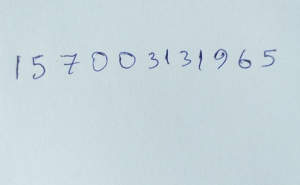

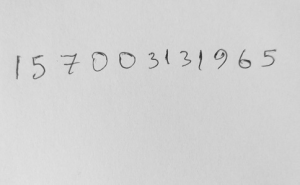

In [43]:
#reading image
img = cv2.imread('sample_image4.jpg')
#resizing image
img = imutils.resize(img,width=300)
#showing original image
cv2_imshow(img)
#converting image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#showing grayscale image
cv2_imshow(gray)

In [44]:
#creating a kernel
kernel = np.ones((40,40),np.uint8)

In [45]:
#applying blackhat thresholding
blackhat = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT,kernel)

In [46]:
#applying OTSU's thresholding
ret,thresh = cv2.threshold(blackhat,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [47]:
#performing erosion and dilation
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [48]:
#finding countours in image
cnts,hie = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [49]:
#loading our ANN model
model = joblib.load('model.pkl')
for c in cnts:
    try:
        #creating a mask
        mask = np.zeros(gray.shape,dtype="uint8")
        
    
        (x,y,w,h) = cv2.boundingRect(c)
        
        hull = cv2.convexHull(c)
        cv2.drawContours(mask,[hull],-1,255,-1)    
        mask = cv2.bitwise_and(thresh,thresh,mask=mask)
        #Getting Region of interest
        roi = mask[y-7:y+h+7,x-7:x+w+7]       
        roi = cv2.resize(roi,(28,28))
        roi = np.array(roi)
        #reshaping roi to feed image to our model
        roi = roi.reshape(1,784)

        #predicting
        prediction = model.predict(roi)
    
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        cv2.putText(img,str(int(prediction)),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)
        
    except Exception as e:
        print(e)

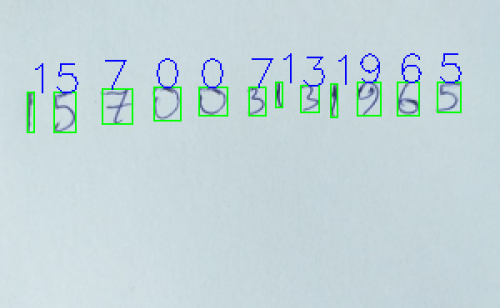

True

In [50]:
img = imutils.resize(img,width=500)

#showing the output
cv2_imshow(img)
cv2.imwrite('result4.jpg',img)